In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from matplotlib.ticker import MultipleLocator
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import ensemble
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import VotingRegressor
import shap
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVR
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)


In [2]:
# Divide the data set
dataset = pd.read_excel('FP-701-selected_features-cv5-18.xlsx')
dataset = dataset.replace (np.nan, 0)
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, 9:29], dataset.iloc[:, 7], test_size=0.2,
random_state=42)
train = dataset.iloc[:,9:29]
print(X_train.shape)
print(X_test.shape)
plt.rcParams['font.family'] = 'Times New Roman'

(560, 18)
(141, 18)


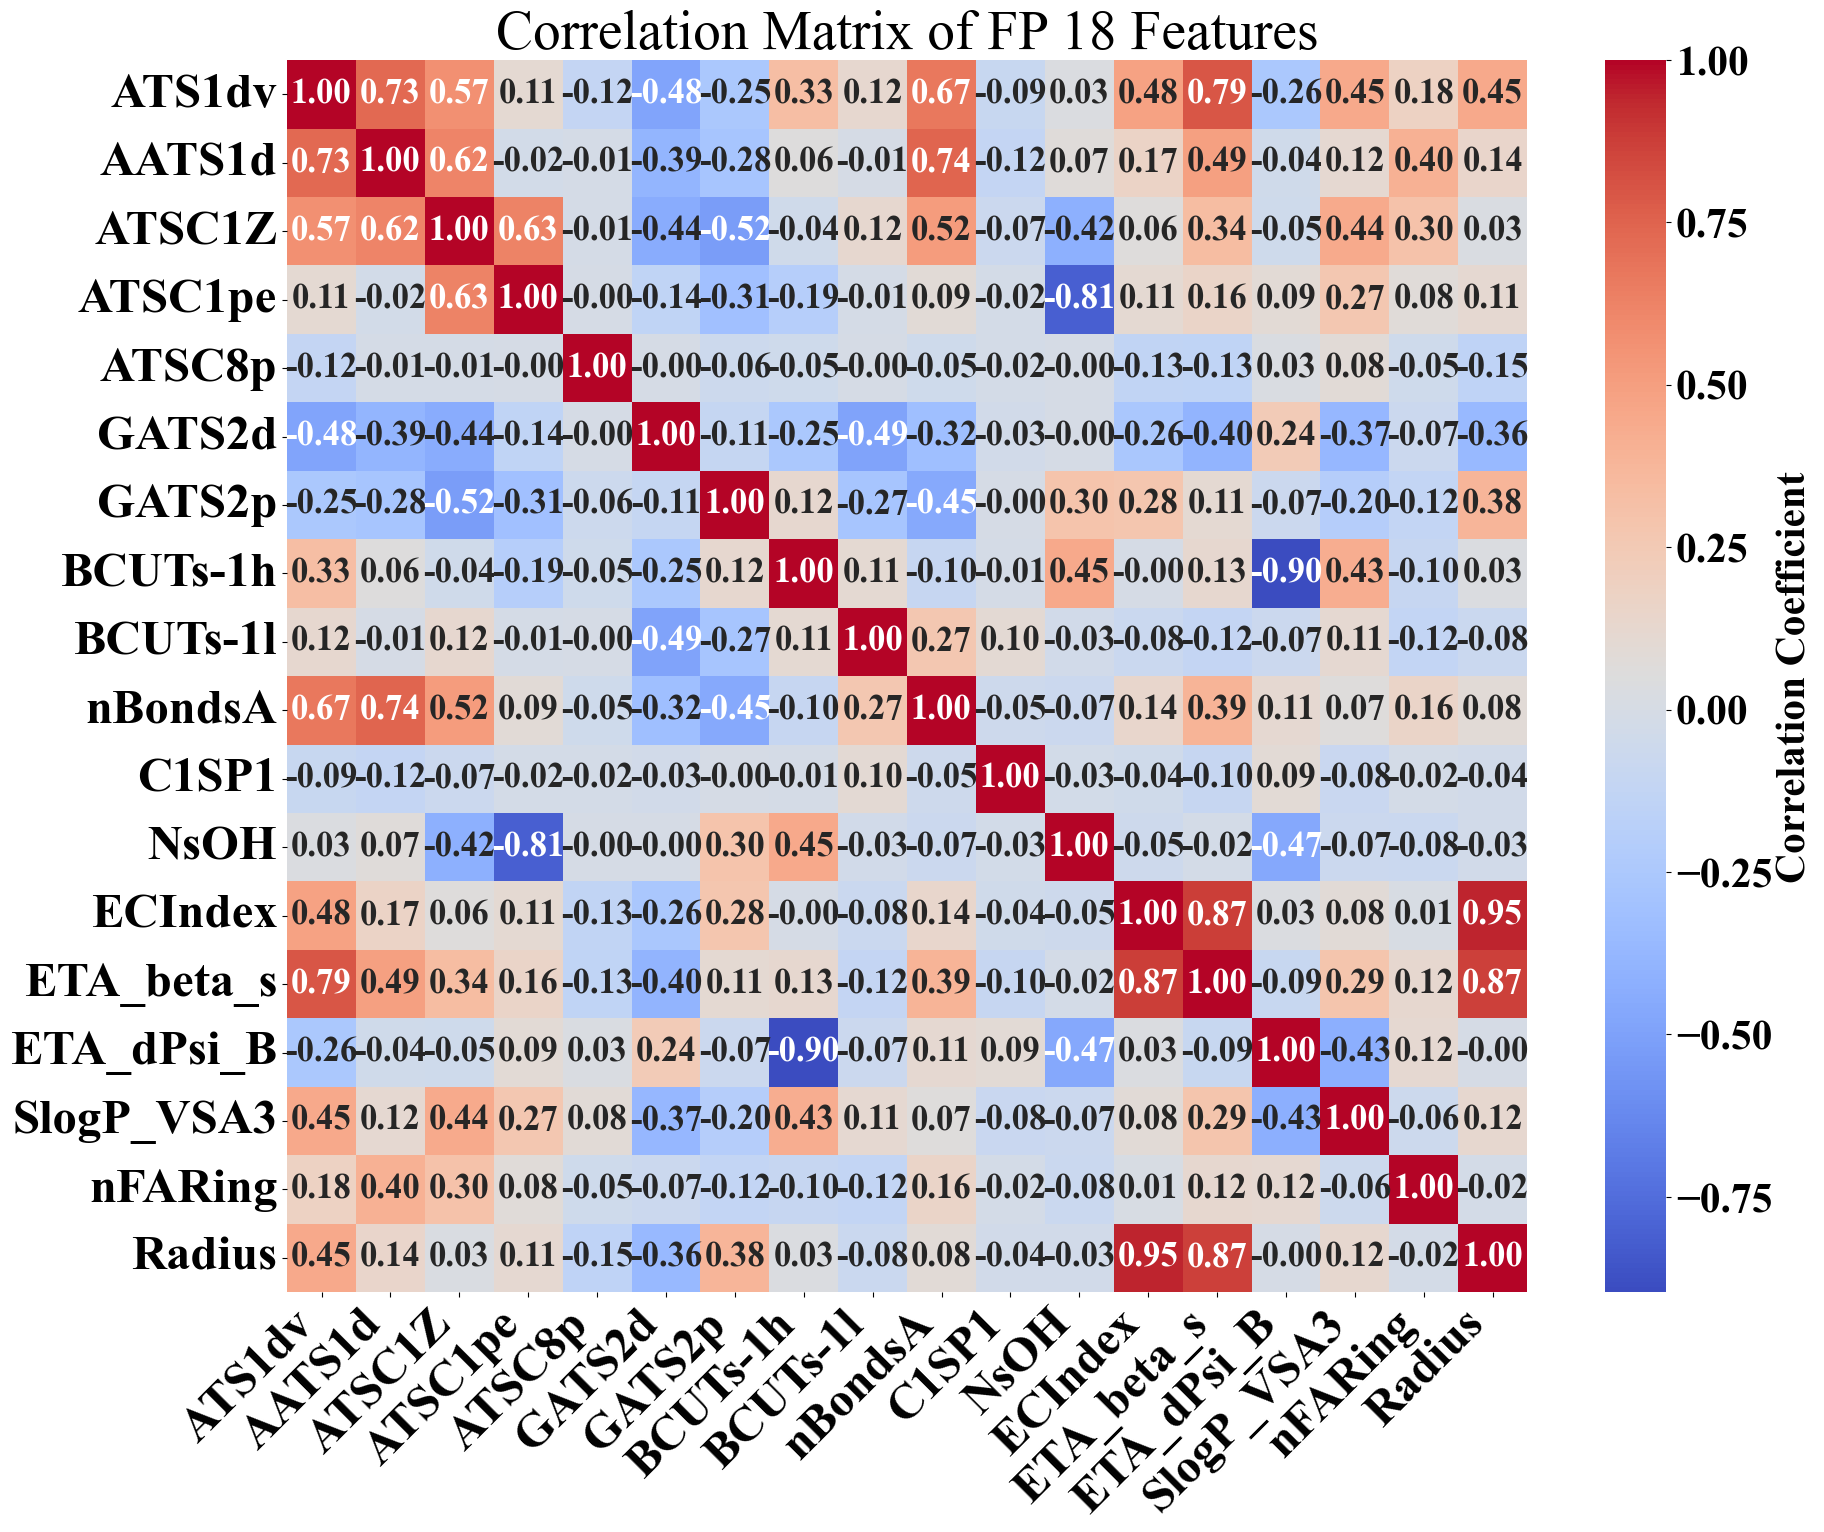

In [9]:
# Read data from the Excel file
excel_data = pd.read_excel('FP-701-selected_features-cv5-18.xlsx', nrows=1)

# Set the font to be larger

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

# Select specific columns as numerical features
numerical_features = excel_data.columns.tolist()[9:27]

# Compute the correlation matrix
correlation_matrix = train[numerical_features].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20,16))

# Set font size for annotations while creating the heatmap
ax = sns.heatmap(correlation_matrix, 
                 annot=True, 
                 cmap='coolwarm', 
                 fmt=".2f", 
                 annot_kws={"size": 25, "fontweight": 'bold'},  # Set annotation font size and bold
                 cbar_kws={'label': 'Correlation Coefficient'})

# Set font style for the color bar (cbar)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)  # Set the font size of the color bar ticks
cbar.set_label('Correlation Coefficient', fontsize=30, weight='bold', fontname='Times New Roman')  # Set the label font of the color bar

# Set the title
plt.title('Correlation Matrix of FP 18 Features', fontsize=40, fontname='Times New Roman')

# Set the font size for axis labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=35, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=35, rotation=0)

# Show the heatmap
plt.show()


In [3]:

# Model Selection and Training

# Initialize the models as one model
models =[("GradientBoostingRegressor", ensemble.GradientBoostingRegressor(random_state=0)),
    ("xgboost", XGBRegressor(random_state=0, n_jobs=-1)),
    ("LinearRegression", LinearRegression()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ( "PLSR" , PLSRegression(n_components=10))]
    #("gpr",  GaussianProcessRegressor(kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)), n_restarts_optimizer=10))   ]

Model: GradientBoostingRegressor
r2: 97.41%
Standard Deviation: 0.67%
Model: xgboost
r2: 97.61%
Standard Deviation: 0.82%
Model: LinearRegression
r2: 95.48%
Standard Deviation: 0.82%
Model: RandomForestRegressor
r2: 97.07%
Standard Deviation: 0.97%
Model: PLSR
r2: 94.97%
Standard Deviation: 1.14%


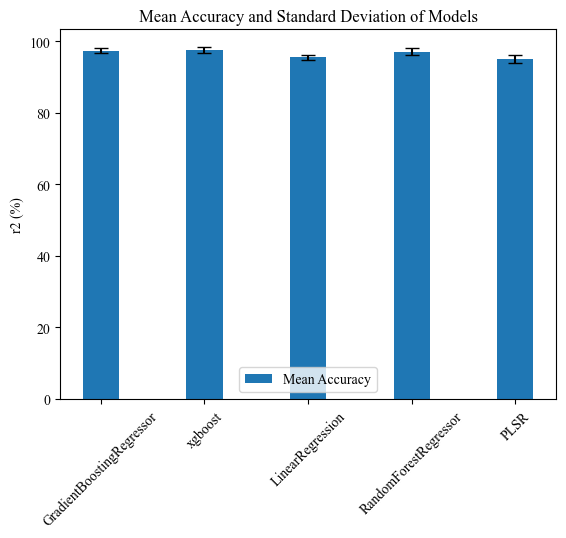

In [4]:
# Initialize lists to store mean accuracies and standard deviations
mean_accuracies = []
std_deviations = []

# Train each model using k-fold cross-validation and store results
for model_name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2',error_score='raise')
    mean_accuracy = cv_results.mean() * 100
    std_deviation = cv_results.std() * 100
    mean_accuracies.append(mean_accuracy)
    std_deviations.append(std_deviation)
    print(f"Model: {model_name}")
    print(f"r2: {mean_accuracy:.2f}%")
    print(f"Standard Deviation: {std_deviation:.2f}%")
    print("=" * 40)

# Plot mean accuracies with error bars
x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, mean_accuracies, width, label='Mean Accuracy', yerr=std_deviations, capsize=5)
ax.set_ylabel('r2 (%)')
ax.set_title('Mean Accuracy and Standard Deviation of Models')
ax.set_xticks(x)
ax.set_xticklabels([model_name for model_name, _ in models])
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [3]:
##5 model independent test set evaluations
best_xgboost = XGBRegressor(max_depth=4, n_estimators=300, random_state=42,learning_rate= 0.1,min_child_weight=9)
best_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=100,  min_samples_split=5,random_state=42)
best_LinearRegression = LinearRegression()
best_RandomForestRegressor = RandomForestRegressor(max_depth= 7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=250,random_state=42)
best_svr = SVR(kernel='rbf', C=1028, gamma=0.01, epsilon= 0.9090547737558148)

best_xgboost.fit(X_train, y_train)
best_GradientBoostingRegressor.fit(X_train, y_train)
best_LinearRegression.fit(X_train, y_train)
best_RandomForestRegressor.fit(X_train, y_train)
best_svr.fit(X_train, y_train)
#best_PLSR.fit(X_train, y_train)
# Evaluate the best models on the test set
xgboost_train_r2 = r2_score(y_train, best_xgboost.predict(X_train))
xgboost_train_rmse = np.sqrt(mean_squared_error(y_train, best_xgboost.predict(X_train)))
xgboost_test_r2 = r2_score(y_test, best_xgboost.predict(X_test))
xgboost_test_rmse = np.sqrt(mean_squared_error(y_test, best_xgboost.predict(X_test)))

GradientBoostingRegressor_train_r2 = r2_score(y_train, best_GradientBoostingRegressor.predict(X_train))
GradientBoostingRegressor_train_rmse = np.sqrt(mean_squared_error(y_train, best_GradientBoostingRegressor.predict(X_train)))
GradientBoostingRegressor_test_r2 = r2_score(y_test, best_GradientBoostingRegressor.predict(X_test))
GradientBoostingRegressor_test_rmse = np.sqrt(mean_squared_error(y_test, best_GradientBoostingRegressor.predict(X_test)))

LinearRegression_train_r2 = r2_score(y_train, best_LinearRegression.predict(X_train))
LinearRegression_train_rmse = np.sqrt(mean_squared_error(y_train, best_LinearRegression.predict(X_train)))
LinearRegression_test_r2 = r2_score(y_test, best_LinearRegression.predict(X_test))
LinearRegression_test_rmse = np.sqrt(mean_squared_error(y_test, best_LinearRegression.predict(X_test)))

RandomForestRegressor_train_r2 = r2_score(y_train, best_RandomForestRegressor.predict(X_train))
RandomForestRegressor_train_rmse = np.sqrt(mean_squared_error(y_train, best_RandomForestRegressor.predict(X_train)))
RandomForestRegressor_test_r2 = r2_score(y_test, best_RandomForestRegressor.predict(X_test))
RandomForestRegressor_test_rmse = np.sqrt(mean_squared_error(y_test, best_RandomForestRegressor.predict(X_test)))

SVR_train_r2 = r2_score(y_train, best_svr.predict(X_train))
SVR_train_rmse = np.sqrt(mean_squared_error(y_train, best_svr.predict(X_train)))
SVR_test_r2 = r2_score(y_test, best_svr.predict(X_test))
SVR_test_rmse = np.sqrt(mean_squared_error(y_test, best_svr.predict(X_test)))

print("XGBRegressor train r2:", xgboost_train_r2)
print("XGBRegressor train RMSE:", xgboost_train_rmse)
print("XGBRegressor Test r2:", xgboost_test_r2)
print("XGBRegressor Test RMSE:", xgboost_test_rmse)

print("GradientBoostingRegressor train r2:", GradientBoostingRegressor_train_r2)
print("GradientBoostingRegressor train RMSE:", GradientBoostingRegressor_train_rmse)
print("GradientBoostingRegressor Test r2:", GradientBoostingRegressor_test_r2)
print("GradientBoostingRegressor Test RMSE:", GradientBoostingRegressor_test_rmse)

print("LinearRegression train r2:", LinearRegression_train_r2)
print("LinearRegression train RMSE:", LinearRegression_train_rmse)
print("LinearRegression Test r2:", LinearRegression_test_r2)
print("LinearRegression Test RMSE:", LinearRegression_test_rmse)

print("RandomForestRegressor train r2:", RandomForestRegressor_train_r2)
print("RandomForestRegressor train RMSE:", RandomForestRegressor_train_rmse)
print("RandomForestRegressor Test r2:", RandomForestRegressor_test_r2)
print("RandomForestRegressor Test RMSE:", RandomForestRegressor_test_rmse)

print("SVR train r2:", SVR_train_r2)
print("SVR  train RMSE:", SVR_train_rmse)
print("SVR  Test r2:", SVR_test_r2)
print("SVR  Test RMSE:",SVR_test_rmse)


XGBRegressor train r2: 0.9988224839562853
XGBRegressor train RMSE: 2.231846019919866
XGBRegressor Test r2: 0.984032375080551
XGBRegressor Test RMSE: 7.503729764871336
GradientBoostingRegressor train r2: 0.992615602023295
GradientBoostingRegressor train RMSE: 5.589054687483017
GradientBoostingRegressor Test r2: 0.9791808712746369
GradientBoostingRegressor Test RMSE: 8.568174429540063
LinearRegression train r2: 0.9604617558162906
LinearRegression train RMSE: 12.9327088753585
LinearRegression Test r2: 0.9576025044273964
LinearRegression Test RMSE: 12.22720308927462
RandomForestRegressor train r2: 0.9884721444439817
RandomForestRegressor train RMSE: 6.983209557030035
RandomForestRegressor Test r2: 0.9725075460488949
RandomForestRegressor Test RMSE: 9.846089454322408
SVR train r2: 0.9994650997462542
SVR  train RMSE: 1.504240279525501
SVR  Test r2: 0.8026214387637118
SVR  Test RMSE: 26.38195732185327


Ensemble Test Accuracy: 0.9848
The mean squared error (MSE) on train set: 3.2465
The mean squared error (MSE) on test set: 7.3271
The R² on train set: 0.9975
The R² on test set: 0.9848
The ME on train set: 14.8324
The ME on test set: 26.5145
[ 7.37573859  7.30202429  7.55092652 10.36960664 11.91411733  8.98857194
  7.06878511  8.5893177   8.02326325 10.87011163]
[0.98549279 0.9850779  0.9879967  0.97352606 0.97102179 0.98259926
 0.98751268 0.98053943 0.98477229 0.97132565]
[21.8056266  27.2810304  27.38890841 40.2077272  45.73659769 31.49566693
 21.20794568 31.78172347 28.5865223  45.17048968]
Cross-validated RMSE scores: 8.805246300354131
Cross-validated r2 scores: 0.9809864544756894
Cross-validated ME scores: 32.0662238356464


<Figure size 640x480 with 0 Axes>

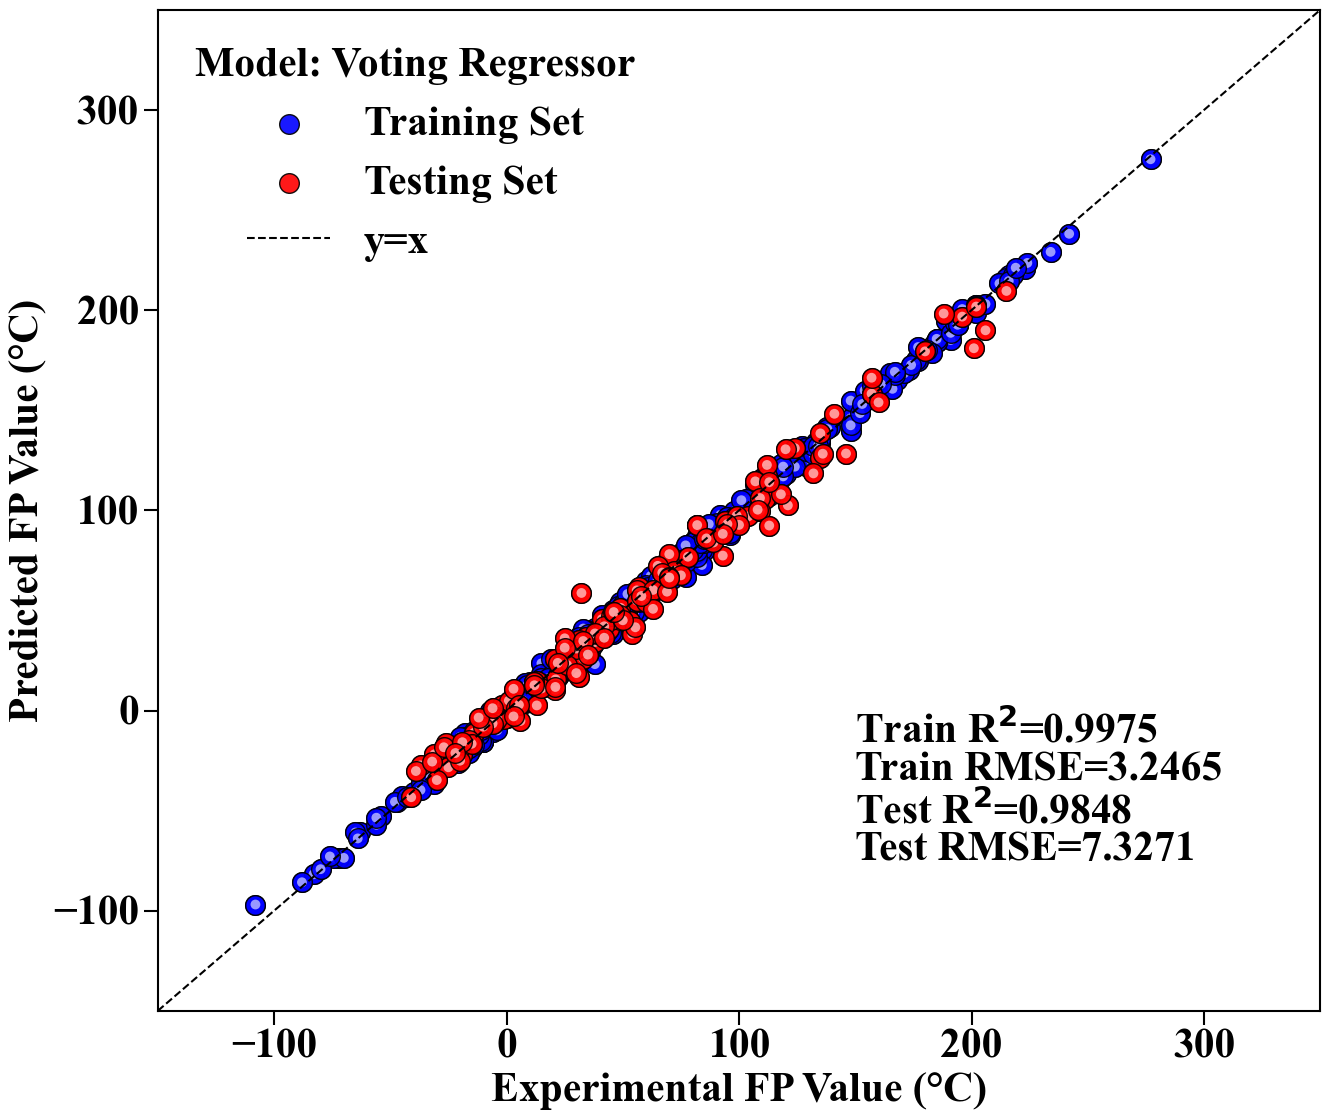

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, max_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold
#VR model's Independent test set validation, and training set 10 fold cross validation

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14

estimators = [('xgboost', best_xgboost), 
              ('GradientBoostingRegressor', best_GradientBoostingRegressor), 
              ('LinearRegression', best_LinearRegression),
              ('RandomForestRegressor', best_RandomForestRegressor),
              ('SVR', best_svr)]

weights = [0.6,0.4,0.0,0.0,0]
ensemble_model = VotingRegressor(estimators=estimators, weights=weights)


ensemble_model.fit(X_train, y_train)


ensemble_test_accuracy = ensemble_model.score(X_test, y_test)  
print(f"Ensemble Test Accuracy: {ensemble_test_accuracy:.4f}")


ensemble_train_rmse = np.sqrt(mean_squared_error(y_train, ensemble_model.predict(X_train)))
ensemble_test_rmse = np.sqrt(mean_squared_error(y_test, ensemble_model.predict(X_test)))
ensemble_train_score = ensemble_model.score(X_train, y_train)
ensemble_test_score = ensemble_model.score(X_test, y_test)
ensemble_train_me = max_error(y_train, ensemble_model.predict(X_train))
ensemble_test_me = max_error(y_test, ensemble_model.predict(X_test))

print("The mean squared error (MSE) on train set: {:.4f}".format(ensemble_train_rmse))
print("The mean squared error (MSE) on test set: {:.4f}".format(ensemble_test_rmse))
print("The R² on train set: {:.4f}".format(ensemble_train_score))
print("The R² on test set: {:.4f}".format(ensemble_test_score))
print("The ME on train set: {:.4f}".format(ensemble_train_me))
print("The ME on test set: {:.4f}".format(ensemble_test_me))


rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)
ME_scorer = make_scorer(max_error)
kf = KFold(n_splits=10, shuffle=True, random_state=52)
scores1 = cross_val_score(ensemble_model, X_train, y_train, cv=kf, scoring=rmse_scorer)
scores2 = cross_val_score(ensemble_model, X_train, y_train, cv=kf, scoring='r2')
scores3 = cross_val_score(ensemble_model, X_train, y_train, cv=kf, scoring=ME_scorer)

print(scores1)
print(scores2)
print(scores3)

average_score1 = np.mean(scores1)
average_score2 = np.mean(scores2)
average_score3 = np.mean(scores3)

print("Cross-validated RMSE scores:", average_score1)
print("Cross-validated r2 scores:", average_score2)
print("Cross-validated ME scores:", average_score3)


plt.clf()
plt.figure(figsize=(15, 13))


plt.xlabel('Experimental FP Value (°C)', fontsize=30, weight='bold')
plt.ylabel('Predicted FP Value (°C)', fontsize=30, weight='bold')
plt.xticks(fontsize=30, weight='bold')
plt.yticks(fontsize=30, weight='bold')


def plot_3d_scatter(x, y, ax, color, label, marker):
    scatter = ax.scatter(x, y, color=color, edgecolor='black', label=label, s=200, alpha=0.9, marker=marker)

    for i in range(len(x)):
        ax.scatter(x[i], y[i], color=color, edgecolor='black', s=200, alpha=0.9, marker=marker)
        ax.scatter(x[i], y[i], color='white', edgecolor='none', s=50, alpha=0.6, marker=marker)


plot_3d_scatter(y_train.values, ensemble_model.predict(X_train), plt, 'blue', 'Training Set', 'o')
plot_3d_scatter(y_test.values, ensemble_model.predict(X_test), plt, 'red', 'Testing Set', 'o')


plt.xlim(left=-150, right=350) 
plt.ylim(bottom=-150, top=350) 


plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.ylim()[0], plt.ylim()[1]], color='black', linestyle='--', label='y=x')

extra_info = 'Model: Voting Regressor'
plt.legend(loc='upper left', title=extra_info, prop={'size': 30, 'weight': 'bold'}, title_fontsize='30', frameon=False)


plt.text(0.6, 0.28, f"Train R$^{{2}}$={ensemble_train_score:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.24, f"Train RMSE={ensemble_train_rmse:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
# plt.text(0.6, 0.24, f"Train ME={ensemble_train_me:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)

plt.text(0.6, 0.20, f"Test R$^{{2}}$={ensemble_test_score:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.16, f"Test RMSE={ensemble_test_rmse:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
# plt.text(0.6, 0.12, f"Test ME={ensemble_test_me:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)


ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.tick_params(width=1.5,length=10)
# 显示图形
plt.show()

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    2.1s remaining:    0.9s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    3.4s finished


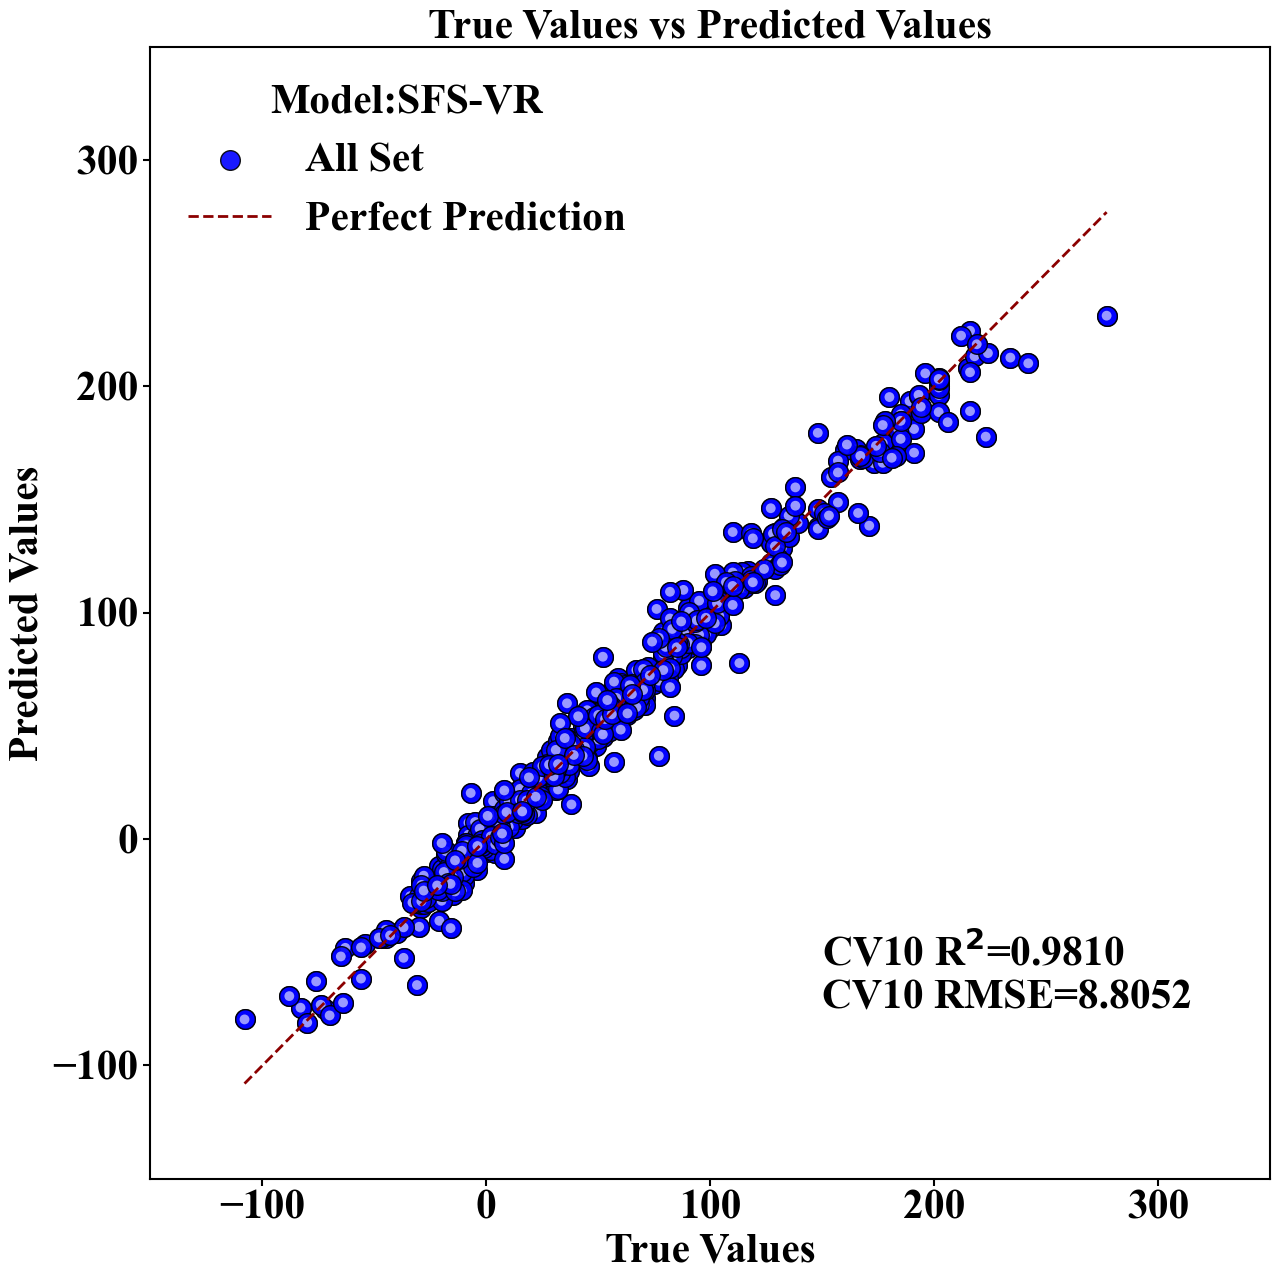

In [6]:
#Training set 10 fold cross validation plot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
plt.figure(figsize=(13, 13))
kf = KFold(n_splits=10, shuffle=True, random_state=52)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.xticks(fontsize=30, weight='bold')
plt.yticks(fontsize=30, weight='bold')
def plot_3d_scatter(x, y, ax, color, label, marker):
    scatter = ax.scatter(x, y, color=color, edgecolor='black', label=label, s=200, alpha=0.9, marker=marker)
    for i in range(len(x)):
        ax.scatter(x[i], y[i], color=color, edgecolor='black', s=200, alpha=0.9, marker=marker)
        ax.scatter(x[i], y[i], color='white', edgecolor='none', s=50, alpha=0.6, marker=marker)
train_cv10_predicted_values = cross_val_predict(ensemble_model, X_train, y_train, cv=kf, n_jobs=8,verbose=2)
# train_cv10_r2 = scores2
# train_cv10_rmse = scores1

plot_3d_scatter(y_train.values, train_cv10_predicted_values, plt, 'blue', 'All Set', 'o')

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='darkred', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.xlabel('True Values', fontsize=30, weight='bold')
plt.ylabel('Predicted Values', fontsize=30, weight='bold')
plt.title('True Values vs Predicted Values', fontsize=30, weight='bold')
plt.xlim(left=-150, right=350) 
plt.ylim(bottom=-150, top=350) 

extra_info = 'Model:SFS-VR'
plt.legend(loc='upper left', title=extra_info, prop={'size': 30, 'weight': 'bold'}, title_fontsize='30', frameon=False, fancybox=True)

plt.text(0.6, 0.20, f"CV10 R$^{{2}}$={average_score2:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.16, f"CV10 RMSE={average_score1:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)

# plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.tick_params(width=1.5, length=5)
plt.show()

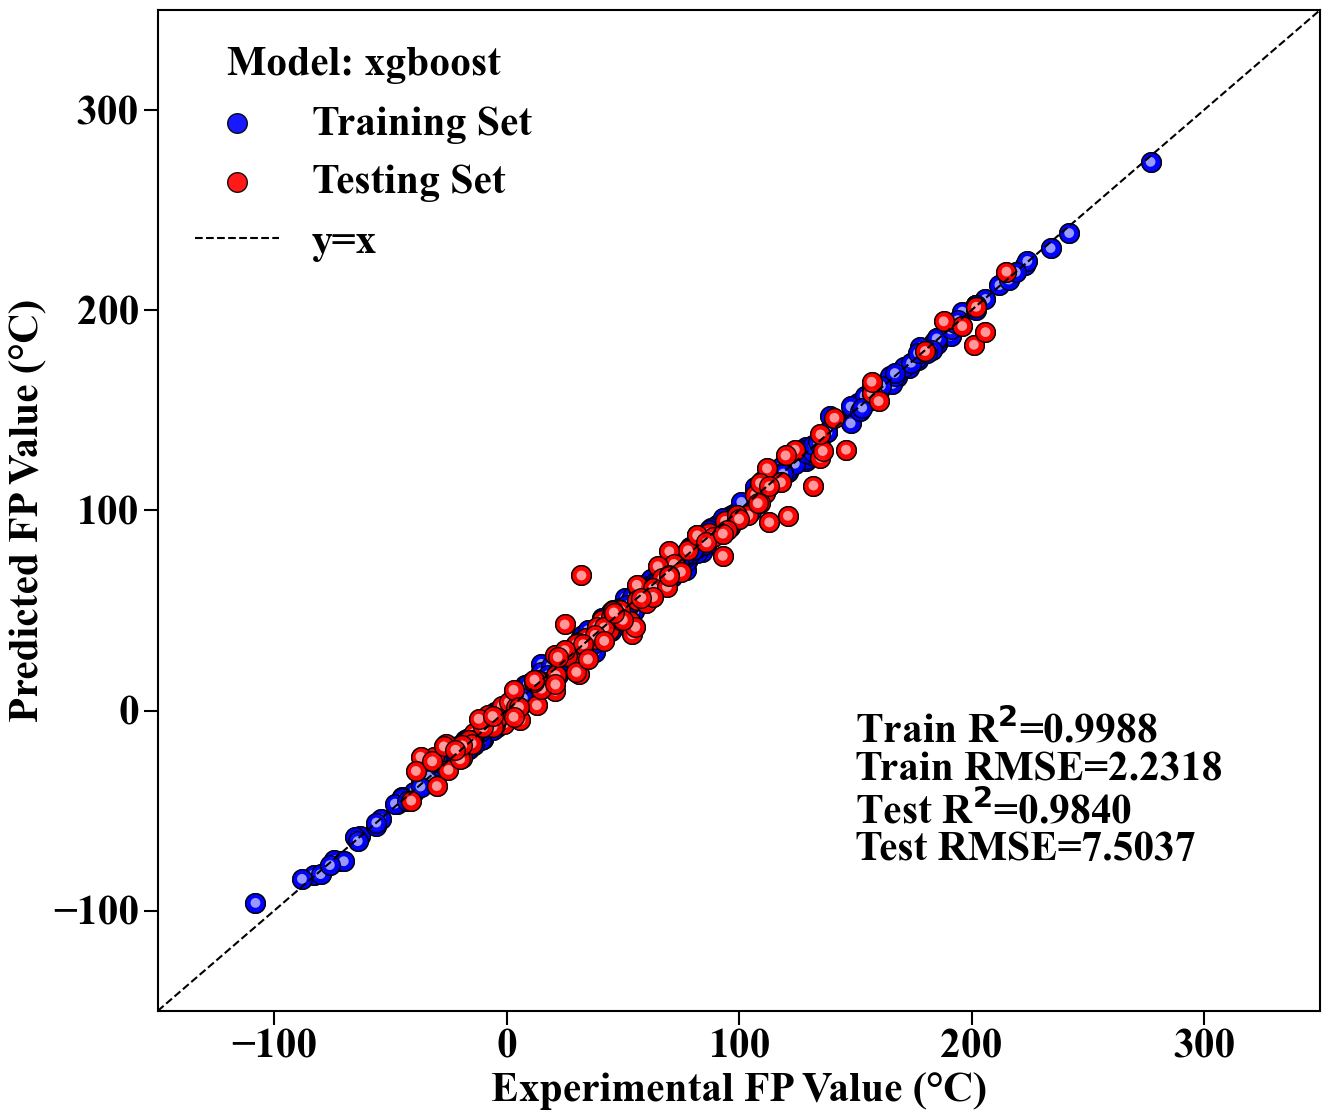

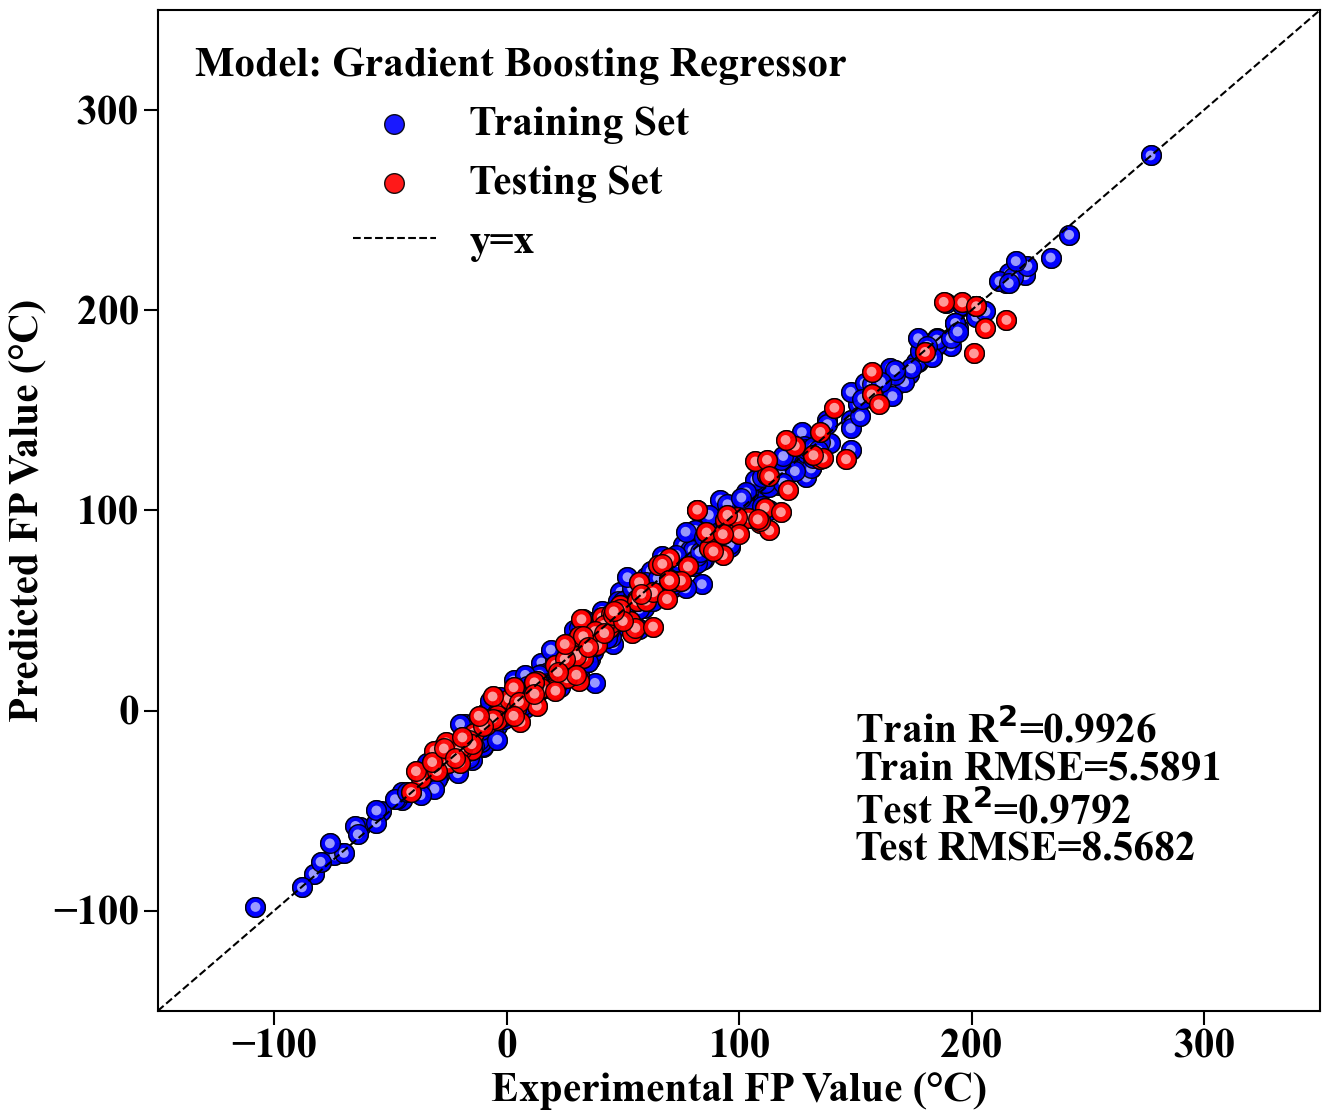

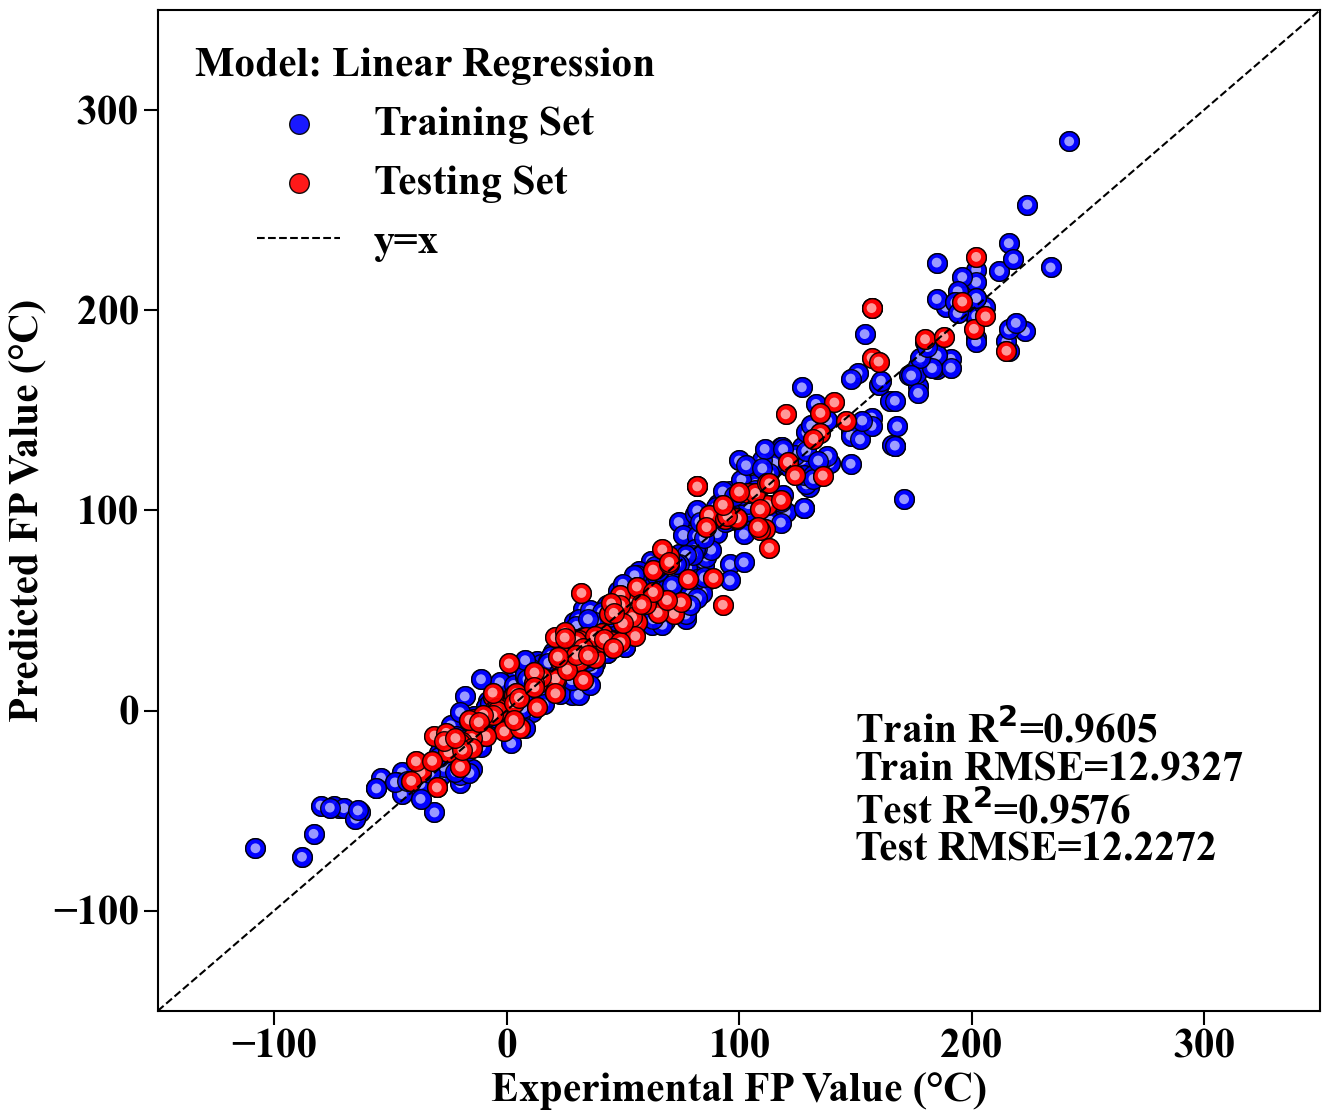

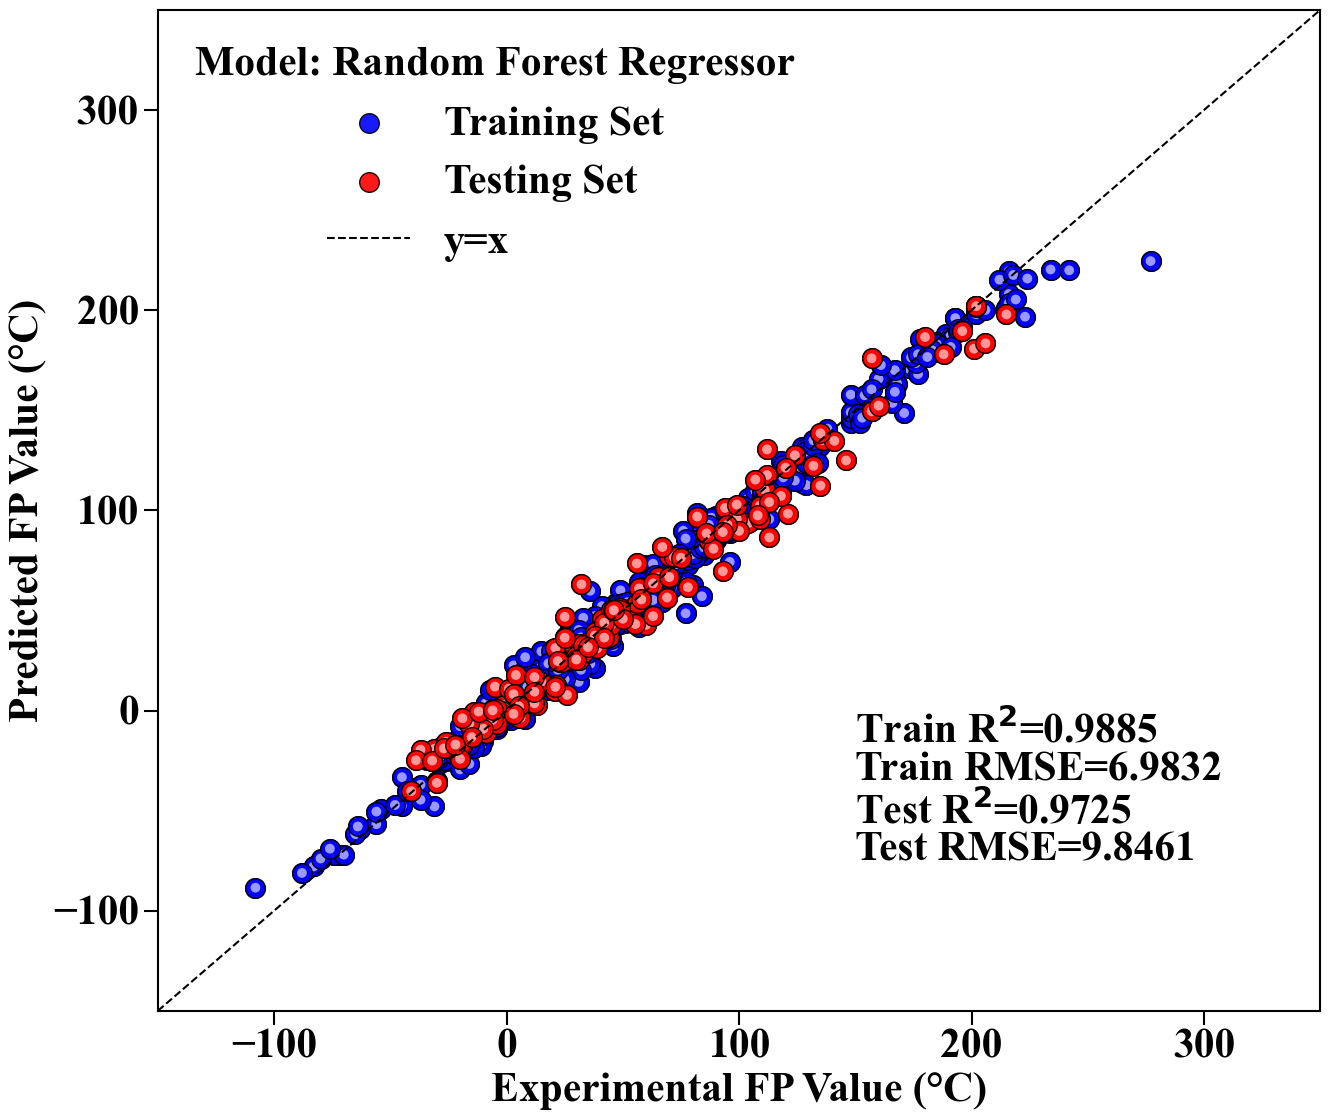

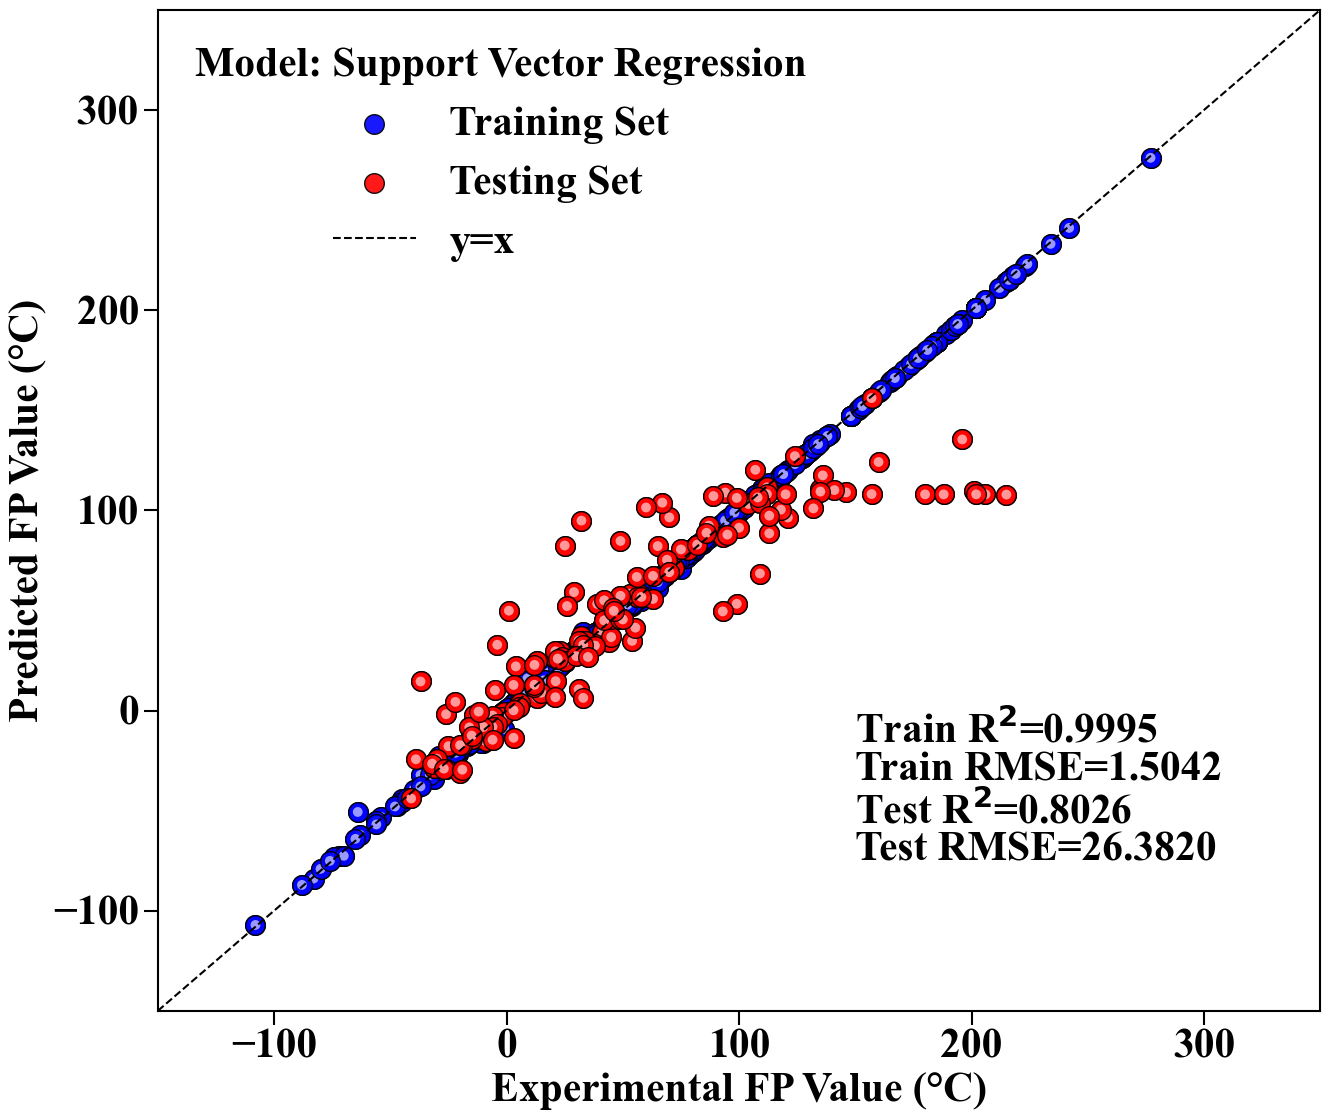

In [27]:
# Plot training set and test set predictions for five models: ‘xgboost’, ‘gradient boosting regressor’, ‘linear regression’, ‘random forest regressor’, and ‘support vector regression’.
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
models = [best_xgboost, best_GradientBoostingRegressor, best_LinearRegression, best_RandomForestRegressor,best_svr]
names = ['xgboost', 'Gradient Boosting Regressor', 'Linear Regression', 'Random Forest Regressor','Support Vector Regression']
for model, name in zip(models, names):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_score = r2_score(y_train, train_pred)
    test_score = r2_score(y_test, test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_ME = max_error(y_train, train_pred)
    test_ME = max_error(y_test, test_pred)
    plt.figure(figsize=(15, 13))
    plt.clf()

    plt.xlabel('Experimental FP Value (°C)', fontsize=30, weight='bold')
    plt.ylabel('Predicted FP Value (°C)', fontsize=30, weight='bold')
    plt.xticks(fontsize=30, weight='bold')
    plt.yticks(fontsize=30, weight='bold')



    def plot_3d_scatter(x, y, ax, color, label, marker):

        scatter = ax.scatter(x, y, color=color, edgecolor='black', label=label, s=200, alpha=0.9, marker=marker)
        for i in range(len(x)):
            ax.scatter(x[i], y[i], color=color, edgecolor='black', s=200, alpha=0.9, marker=marker)
            ax.scatter(x[i], y[i], color='white', edgecolor='none', s=50, alpha=0.6, marker=marker)

    ax = plt.gca()

    plot_3d_scatter(y_train.values, train_pred, ax, 'blue', 'Training Set', 'o')

    plot_3d_scatter(y_test.values, test_pred, ax, 'red', 'Testing Set', 'o')

    plt.xlim(left=-150, right=350) 
    plt.ylim(bottom=-150, top=350) 
    plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.ylim()[0], plt.ylim()[1]], color='black', linestyle='--', label='y=x')

    extra_info = f'Model: {name}'
    plt.legend(loc='upper left', title=extra_info, prop={'size': 30}, title_fontsize='30', frameon=False)
    plt.text(0.6, 0.28, f"Train R$^{{2}}$={train_score:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    plt.text(0.6, 0.24, f"Train RMSE={train_rmse:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    # plt.text(0.6, 0.24, f"Train ME={train_ME:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    plt.text(0.6, 0.20, f"Test R$^{{2}}$={test_score:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    plt.text(0.6, 0.16, f"Test RMSE={test_rmse:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    # plt.text(0.6, 0.12, f"Test ME={test_ME:.4f}", fontsize=30, ha='left', weight='bold', va='center', transform=plt.gca().transAxes)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    plt.tick_params(width=1.5,length=10)

    # 显示图形
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'C1SP1'),
  Text(0, 1, 'nFARing'),
  Text(0, 2, 'ETA_dPsi_B'),
  Text(0, 3, 'nBondsA'),
  Text(0, 4, 'Radius'),
  Text(0, 5, 'ATSC8p'),
  Text(0, 6, 'SlogP_VSA3'),
  Text(0, 7, 'BCUTs-1l'),
  Text(0, 8, 'ATSC1Z'),
  Text(0, 9, 'GATS2d'),
  Text(0, 10, 'AATS1d'),
  Text(0, 11, 'GATS2p'),
  Text(0, 12, 'NsOH'),
  Text(0, 13, 'BCUTs-1h'),
  Text(0, 14, 'ATS1dv'),
  Text(0, 15, 'ECIndex'),
  Text(0, 16, 'ATSC1pe'),
  Text(0, 17, 'ETA_beta_s')])

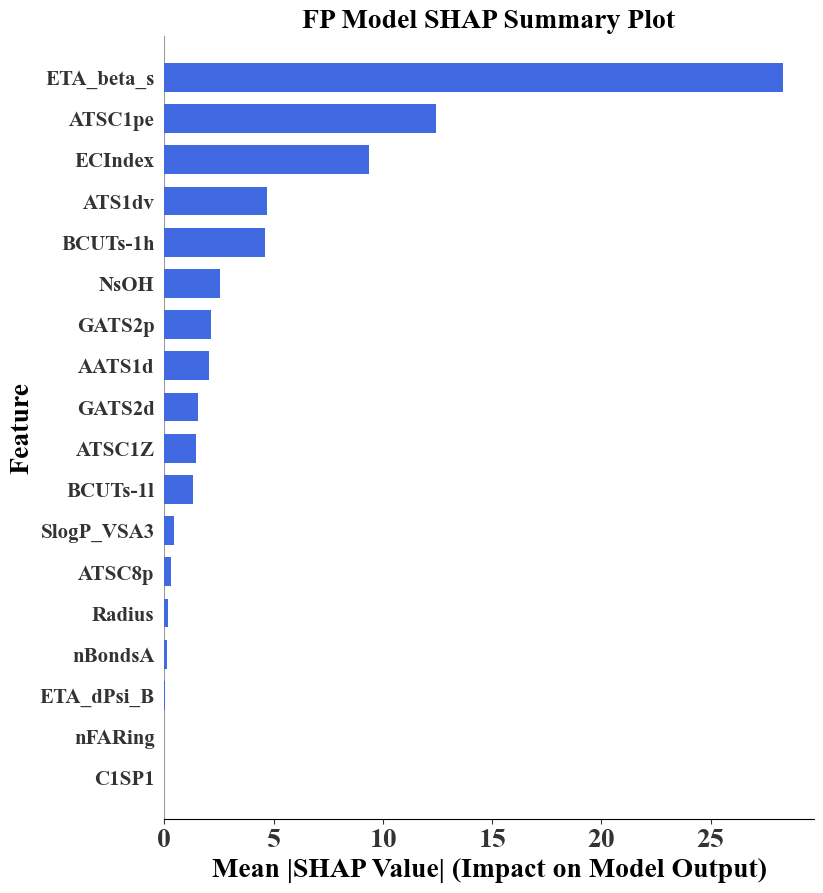

In [29]:
# Plotting Shap charts
base_models = ensemble_model.named_estimators_
weights = np.array([0.6,0.4,0.0,0.0,0])

shap_values_dict = {}

for (model_name, model), weight in zip(base_models.items(), weights):
    if weight == 0:
        continue
    
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)
    
    shap_values_dict[model_name] = shap_values.values * weight


shap_values_combined = np.sum(list(shap_values_dict.values()), axis=0)
# shap.summary_plot(shap_values_combined, X_train)
# shap.summary_plot(shap_values, X_train, plot_type="bar", color='royalblue', show=False)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

shap.summary_plot(shap_values_combined, X_train, plot_type="bar", color='royalblue', show=False)

fig = plt.gcf()
ax = plt.gca()

ax.set_title('FP Model SHAP Summary Plot', fontsize=20, weight='bold')
ax.set_xlabel('Mean |SHAP Value| (Impact on Model Output)', fontsize=20, weight='bold')
ax.set_ylabel('Feature', fontsize=20, weight='bold')
plt.xticks(fontsize=20, weight='bold')
plt.yticks(fontsize=15, weight='bold')